In [673]:
from data_col import *
from process import *
from classify import *
from analyse import *
%matplotlib notebook 
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
pd.options.display.max_rows = 999
pd.set_option('precision', 5)

In [ ]:
def color_col(v):
    if "logl2" in v.name:
        return ['background-color: yellow' if i == 1 else "" for i in v]
    elif "multi" in v.name:
        return ['background-color: red' if i == 1 else "" for i in v]
    elif "entropy" in v.name:
        return ['background-color: blue' if i == 1 else "" for i in v]
    elif "ksconf" in v.name:
        return ['background-color: green' if i == 1 else "" for i in v]
    else:
        return ['' for _ in v]
    return res

def color_col_data(v):
    if "Res" in v.name:
        return ['background-color: green' if i == 1 else "" for i in v]
    elif "Suq" in v.name:
        return ['background-color: blue' if i == 1 else "" for i in v]
    else:
        return ['' for _ in v]
    return res


def col_simple(v):
    return ['background-color: green' if i == 1 else "" for i in v]

def col_min(v, ref):
    v2 = v.values
    return ['background-color: #84befb' if v2[i] == ref[i] else "" for i in range(len(v2))]

In [ ]:
multi = MultiClassifier([BasicClassifier(), EntropyClassifier(), GeoClassifier(), MarginClassifier(), L2Classifier()])

In [3]:
sing = [BasicClassifier(), EntropyClassifier(), GeoClassifier(aggregate_interval=None), MarginClassifier(), L2Classifier(), LogL2Classifier(), ConfSAvrClassifier()]

In [ ]:
pS = [[Process(SquCal[0], i, j)  for j in sing] for i in SquN]
anaS = [Analysis(i) for i in pS]

pR = [[Process(ResCal[0], i, j)  for j in sing] for i in ResN]
anaR = [Analysis(i) for i in pR]

In [ ]:
dfsS = [a.compose_report() for a in anaS]
dfsR = [a.compose_report() for a in anaR]

In [ ]:
def compute_first_1(dfs, pro, data_name=None, as_df=True):
    data = []
    for j in range(len(dfs)):
        df = dfs[j]
        p = pro[j]
        for d in df.groupby("alpha"):
                for i in p:
                    if data_name is not None:
                        dp = int(i.test_data.get_name().replace(data_name, ""))
                    else:
                        dp = i.test_data.get_name()
                    if len( d[1][d[1][i.get_name()]>=1])>0:
                        r = [dp, d[0], i.classifier.get_name(), d[1][d[1][i.get_name()]>=1].iloc[0]["bs"]]
                    else: 
                        r = [dp, d[0], i.classifier.get_name(), np.NaN]
                    data.append(r)
    if as_df:
        data = pd.DataFrame(data, columns=["percent", "alpha", "clf", "bs"])
    return data

In [ ]:
dfS = compute_first_1(dfsS, pS, data_name="SuqN")
dfR = compute_first_1(dfsR, pR, data_name="ResN")

In [ ]:
n = 2
tabl = [i[1] for i in dfS.groupby("alpha")] 
obs = tabl[n].pivot(index='percent', columns='clf', values='bs')
obs.style.apply(lambda x: col_min(x,obs.min(axis=1).values)) 

# sns.barplot(data=tabl[1], x="percent", y="bs", hue="clf")
sns.heatmap(obs, annot=True, cmap="YlGnBu_r", norm=LogNorm(), fmt=".0f")

In [ ]:
tabl = [i for i in dfR.groupby("percent")] 
for n in range(len(tabl)):
    obs = tabl[n][1].pivot(index='alpha', columns='clf', values='bs')
    if n == 0:
        df = pd.DataFrame((obs.sub(obs.min(axis=1), axis=0)==0).sum(), columns=[tabl[n][0]])
    else:
        df[tabl[n][0]] = (obs.sub(obs.min(axis=1), axis=0)==0).sum()
df.transpose()
sns.heatmap(df.transpose(), annot=True, cmap="YlGnBu", fmt=".0f")

In [ ]:
obs

In [ ]:
obs.min(axis=1)

In [ ]:
n=2
tabl = [i[1] for i in dfR.groupby("alpha")] 
obs = tabl[n].pivot(index='percent', columns='clf', values='bs')
obs.style.apply(lambda x: col_min(x,obs.min(axis=1).values)) 
sns.heatmap(obs, annot=True, cmap="YlGnBu_r", norm=LogNorm(), fmt=".0f")

In [ ]:
df.style.apply(col_simple)

In [ ]:
ana = Analysis([Process(SquCal[0], SquVal[0], multi)])

In [ ]:
ana.compose_report()

In [ ]:
w = [0.9,0.05, 0.025, 0.025]
x = [0.9,0.05,0.02,0.01,0.007,0.006,0.005, 0.00025, 0.00025, 0.00025, 0.00025, 0.0002, 0.0002, 0.0002, 0.00015, 0.00015, 0.0001, 0.00000000000000000000000000000000001]
y = [0.7,0.1,0.1,0.05,0.025, 0.025]
z = [0.3,0.3,0.2,0.2]

In [ ]:
sum(z)

In [ ]:
def eva(x):
    data = np.array([x])
    print(stats.gmean(x))
    print(np.exp(np.mean(np.log(x))))
    print(np.linalg.norm(np.log(x)))
    print(np.linalg.norm(x))
    print(np.average((data-np.roll(data, -1, axis=1))[:, :-1], axis=1, weights=data[:, :-1]))

In [ ]:
eva(w)

In [ ]:
eva(x)

In [ ]:
eva(y)

In [ ]:
eva(z)

In [ ]:
ana = DataAnalysis([Process(ResAwA[0], ResAwA[0], i) for i in [BasicClassifier(), L2Classifier(), LogL2Classifier(), MarginClassifier()]])

In [ ]:
ana.draw_hist()

In [ ]:
multi = MultiClassifier([BasicClassifier(), EntropyClassifier(aggregate_interval=None), GeoClassifier(), MarginClassifier(), L2Classifier()])

In [ ]:
pip install seaborn --upgrade

In [ ]:
anaS = Analysis([Process(SquCal[0], SquAwA[-1], i) for i in sing])
anaR = Analysis([Process(ResCal[0], ResAwA[-1], i) for i in sing])
anaS.draw_roc("bs", 100)

In [ ]:
anaS.draw_auc_curve(from_to=(0, 3000), process_map_foo=ana.default_process_map)

In [ ]:
pd.set_option('precision', 5)
anaS = Analysis([Process([SquCal[0], ResCal[0]][j], [SquAwA[-1], ResAwA[-1]][j], i) for i in sing for j in range(2)])
df = anaS.compose_report()
df[df["alpha"]==0.01].style.apply(color_col_data)

In [ ]:
pd.set_option('precision', 5)
df = anaS.compose_report()
df.style.apply(col_simple)

In [ ]:
[Process([SquCal[0], ResCal[0]][j], [SquAwA[-1], ResAwA[-1]][j], i) for i in sing for j in range(2)]

In [88]:
ana = Analysis([Process(SquCal[0], i, j) for i in SquOOS  for j in sing] + [Process(ResCal[0], i, j) for i in ResOOS  for j in sing])

In [89]:
df = ana.flatten_results()
df[["process","cdata","tdata"]] = (df["process"].str.split("-", expand=True))[[1,2,3]]
df = df[["cdata", "tdata", "process", "bs", "alpha", "iter", "result"]]

In [90]:
df = df[["cdata", "tdata", "process", "bs", "alpha", "iter", "result"]]

In [178]:
new_df = pd.DataFrame(columns=["bs", "alpha", "process", "result"])
for i in df.groupby(["bs", "alpha"]):
    for n, j in enumerate(i[1].groupby(["cdata", "tdata"])):
        v = j[1].sort_values(by="result")[["bs", "alpha", "process", "result"]]
        v["result"] = range(1,len(v["result"])+1)
        #m = v[v["process"]=="ksconf"]["result"].values
        #v["result"] = v["result"]-m
        v = v.sort_values(by="process")
        if n == 0:
            bdf = v
        else:
            bdf["result"] = bdf["result"].values + v["result"].values
    bdf["result"] =  bdf["result"] / (n+1)
    new_df = pd.concat([new_df, bdf])
new_df["process"] = new_df["process"].replace("ksconf", "max")
new_df["process"] = new_df["process"].replace("margin_0_1", "margin")
new_df["result"] = pd.to_numeric(new_df["result"])

In [179]:
new_df["result"] = pd.to_numeric(new_df["result"])
#pl = new_df[new_df["process"]=="max"].pivot(index="bs", columns="alpha", values="result")
new_df

,bs,alpha,process,result
7260,5.0,0.001,confsavr,4.38889
6985,5.0,0.001,entropy,4.58333
7040,5.0,0.001,geo,4.16667
6930,5.0,0.001,max,2.77778
7150,5.0,0.001,l2,4.44444
7205,5.0,0.001,logl2,5.19444
7095,5.0,0.001,margin,2.44444
7271,5.0,0.005,confsavr,3.38889
6996,5.0,0.005,entropy,5.27778
7051,5.0,0.005,geo,4.22222


In [180]:
def plot_foo(total_data):
    min_val = total_data["result"].min()
    max_val = total_data["result"].max()
    def foo(data, *args, **kwargs):
        pl = data.pivot(index="bs", columns="alpha", values="result")
        sns.heatmap(pl,annot=True, cmap="YlGnBu",  fmt=".3f", vmin=min_val, vmax=max_val)
    return foo

<IPython.core.display.Javascript object>


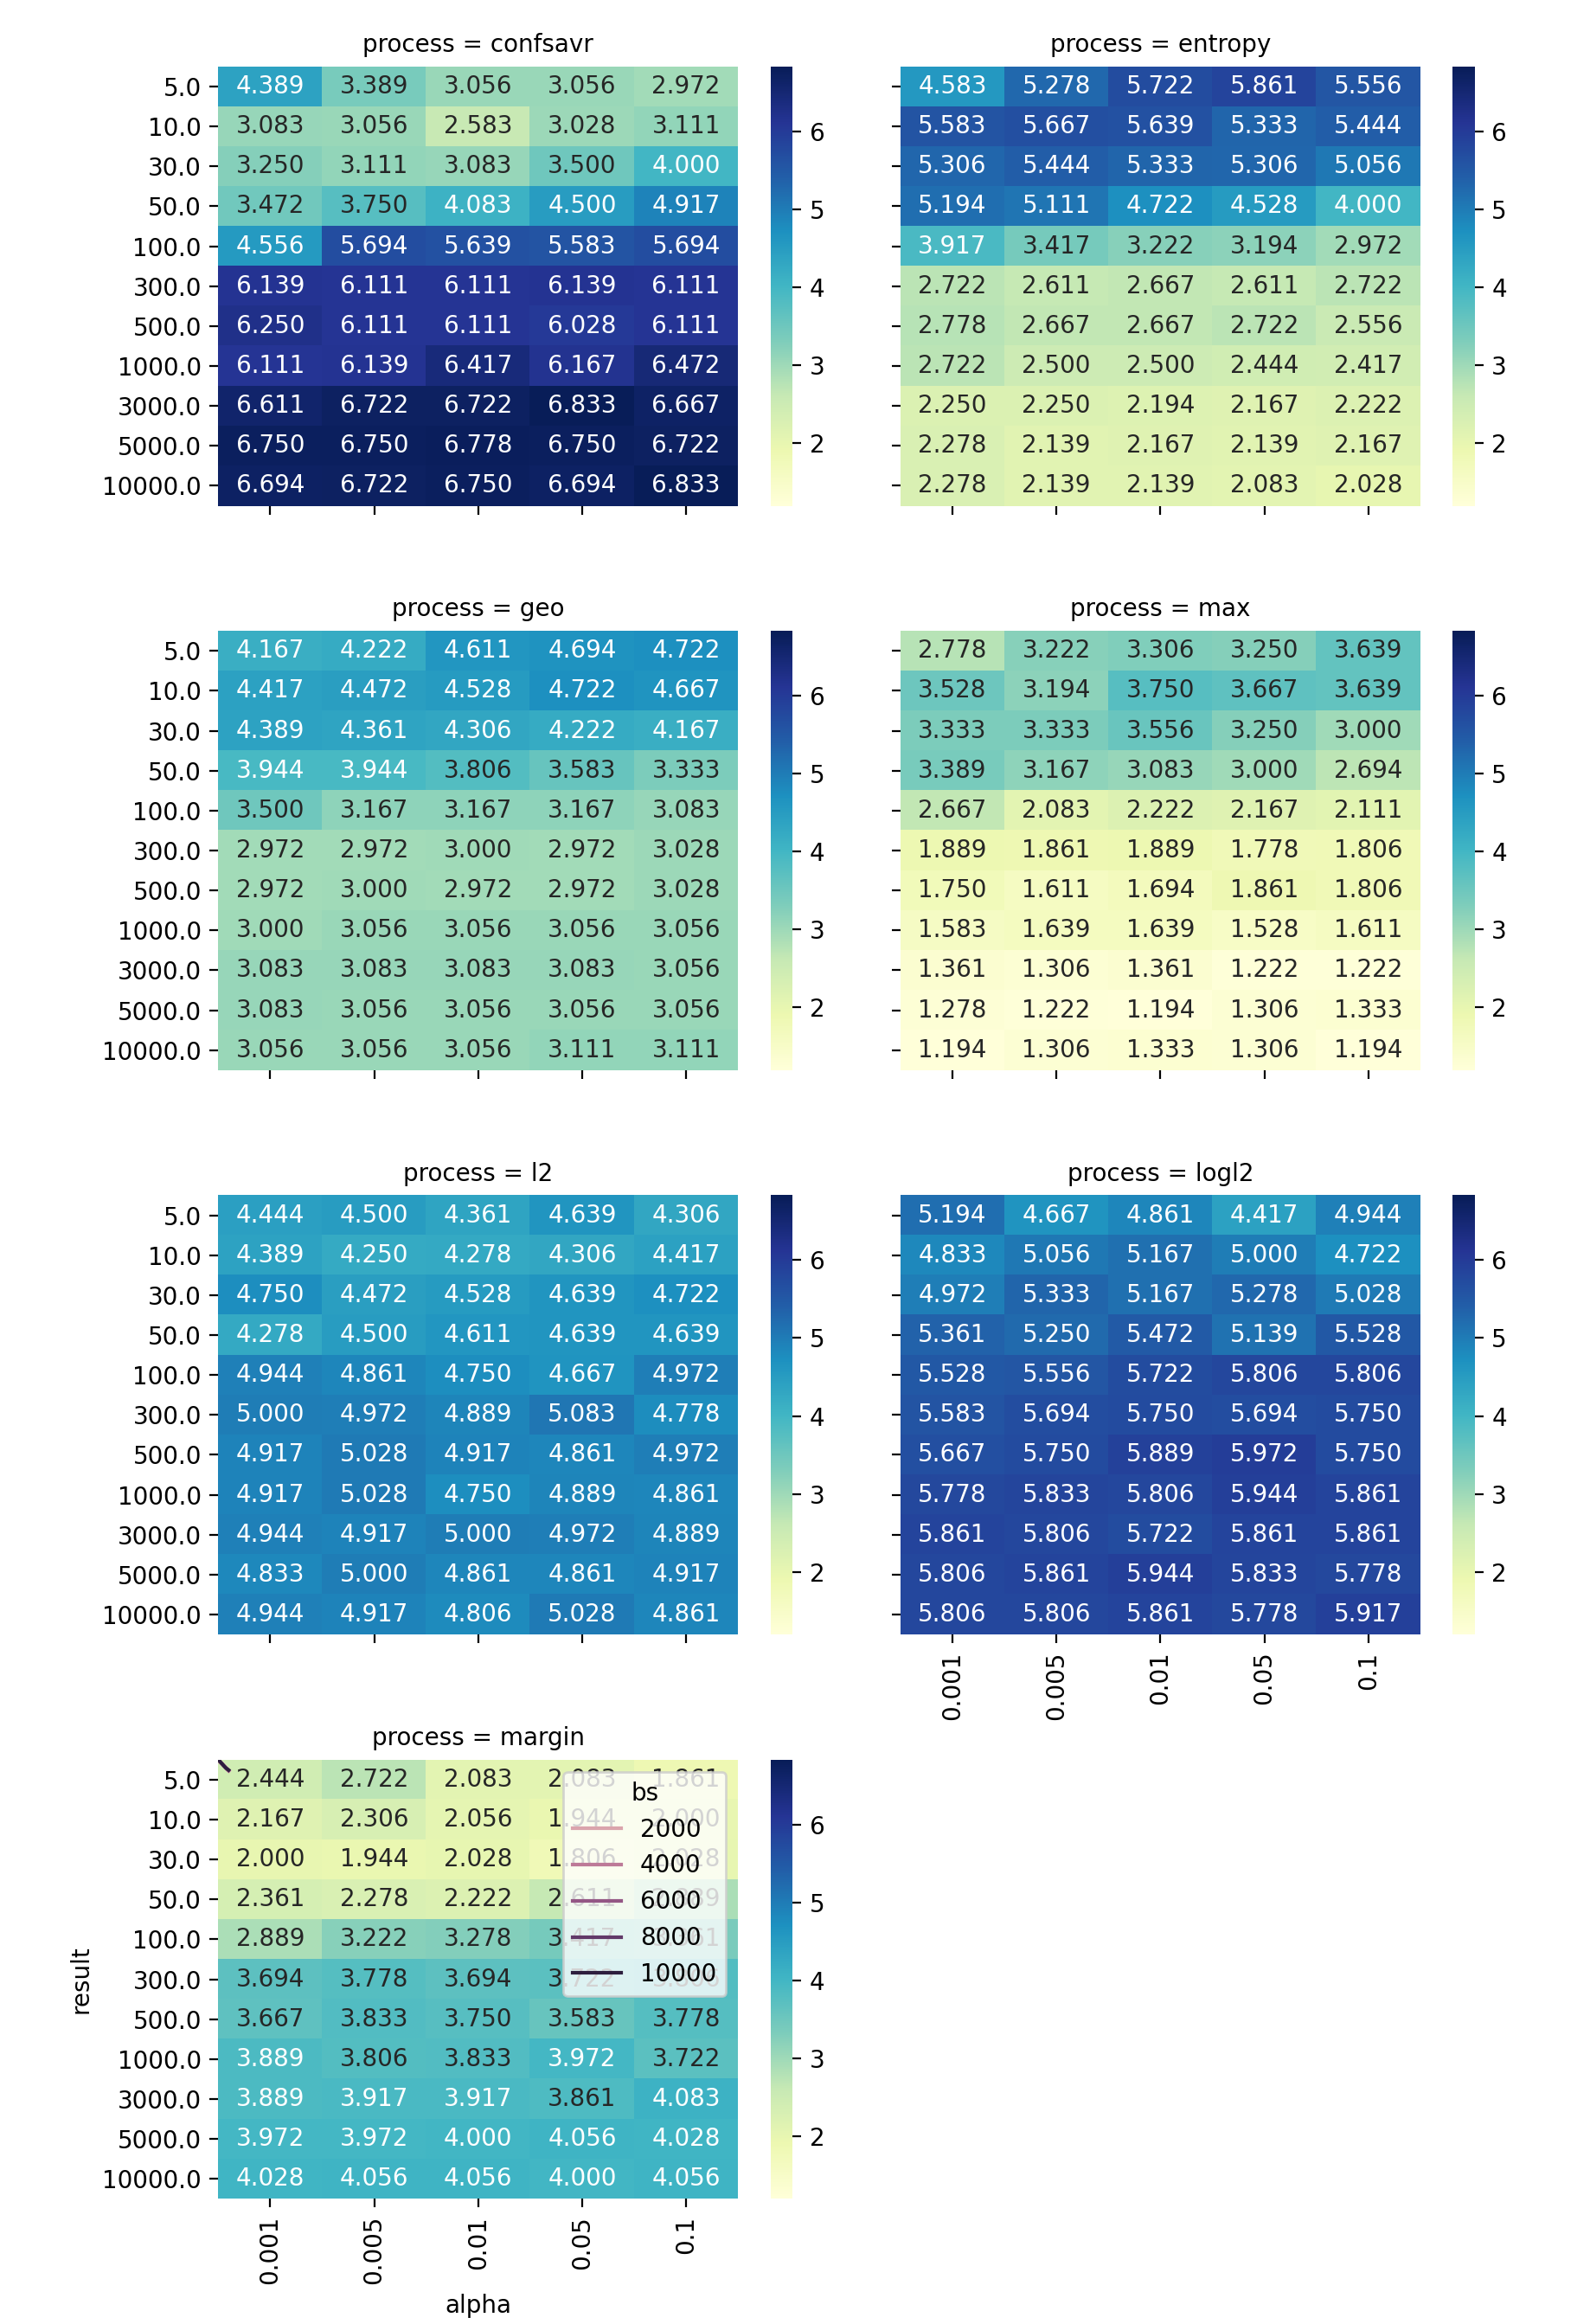

In [181]:

g = sns.FacetGrid(new_df, col="process", col_wrap=2)
g = g.map_dataframe(plot_foo(new_df))


In [260]:
ana = Analysis([Process(ResCal[0], ResVal[0], BasicClassifier())])
df2 = ana.compose_report()

In [261]:
ana = Analysis([Process(ResCal[0], ResVal[0], EmpiricMultiClassifier([BasicClassifier(), Basic2Classifier(), Basic3Classifier()]))])

In [265]:
df = ana.compose_report()
df["sing"]=df2["basic-ksconf-ResCal-ResVal"]
df[df["alpha"]>0.001]

,bs,alpha,basic-emulti_ksconf_p2_p3-ResCal-ResVal,sing
11,5.0,0.005,0.0055,0.0053
12,10.0,0.005,0.0038,0.0056
13,30.0,0.005,0.0061,0.0049
14,50.0,0.005,0.0060,0.0057
15,100.0,0.005,0.0042,0.0040
16,300.0,0.005,0.0045,0.0056
17,500.0,0.005,0.0064,0.0052
18,1000.0,0.005,0.0044,0.0034
19,3000.0,0.005,0.0071,0.0056
20,5000.0,0.005,0.0071,0.0070


In [251]:
conf = pd.read_csv("config/basic-emulti_ksconf_p2_p3-SuqCal-SuqCal.csv", names=["bs", "alpha", "iter", "result"])

In [253]:
conf["result"] = conf["result"]/df["iter"]
conf

,bs,alpha,iter,result
0,5.0,0.001,10000.0,0.0034
1,10.0,0.001,10000.0,0.0020
2,30.0,0.001,10000.0,0.0032
3,50.0,0.001,10000.0,0.0041
4,100.0,0.001,10000.0,0.0036
5,300.0,0.001,10000.0,0.0030
6,500.0,0.001,10000.0,0.0032
7,1000.0,0.001,10000.0,0.0036
8,3000.0,0.001,10000.0,0.0028
9,5000.0,0.001,10000.0,0.0041


In [233]:
dfs = []
for d in  df.groupby("bs"):
    b = d[1].copy()
    b["talpha"] = np.interp(b["alpha"], b["result"], b["alpha"])
    b["balpha"] = b["alpha"]/3
    dfs.append(b)

In [249]:
n = -2
dfs[n]

,bs,alpha,iter,result,talpha,balpha
9,5000.0,0.001,10000.0,0.0041,0.00100,0.00033
20,5000.0,0.005,10000.0,0.0151,0.00133,0.00167
31,5000.0,0.010,10000.0,0.0328,0.00315,0.00333
42,5000.0,0.015,10000.0,0.0456,0.00496,0.00500
53,5000.0,0.020,10000.0,0.0617,0.00638,0.00667
64,5000.0,0.030,10000.0,0.0873,0.00921,0.01000
75,5000.0,0.040,10000.0,0.1138,0.01281,0.01333
86,5000.0,0.050,10000.0,0.1399,0.01637,0.01667
97,5000.0,0.075,10000.0,0.2183,0.02520,0.02500
108,5000.0,0.100,10000.0,0.2740,0.03479,0.03333


In [242]:
dfs[6]

,bs,alpha,iter,result,talpha,balpha
6,500.0,0.001,10000.0,0.0032,0.00100,0.00033
17,500.0,0.005,10000.0,0.0148,0.00162,0.00167
28,500.0,0.010,10000.0,0.0307,0.00334,0.00333
39,500.0,0.015,10000.0,0.0439,0.00506,0.00500
50,500.0,0.020,10000.0,0.0599,0.00664,0.00667
61,500.0,0.030,10000.0,0.0867,0.00978,0.01000
72,500.0,0.040,10000.0,0.1091,0.01352,0.01333
83,500.0,0.050,10000.0,0.1391,0.01691,0.01667
94,500.0,0.075,10000.0,0.2102,0.02563,0.02500
105,500.0,0.100,10000.0,0.2718,0.03594,0.03333


<IPython.core.display.Javascript object>


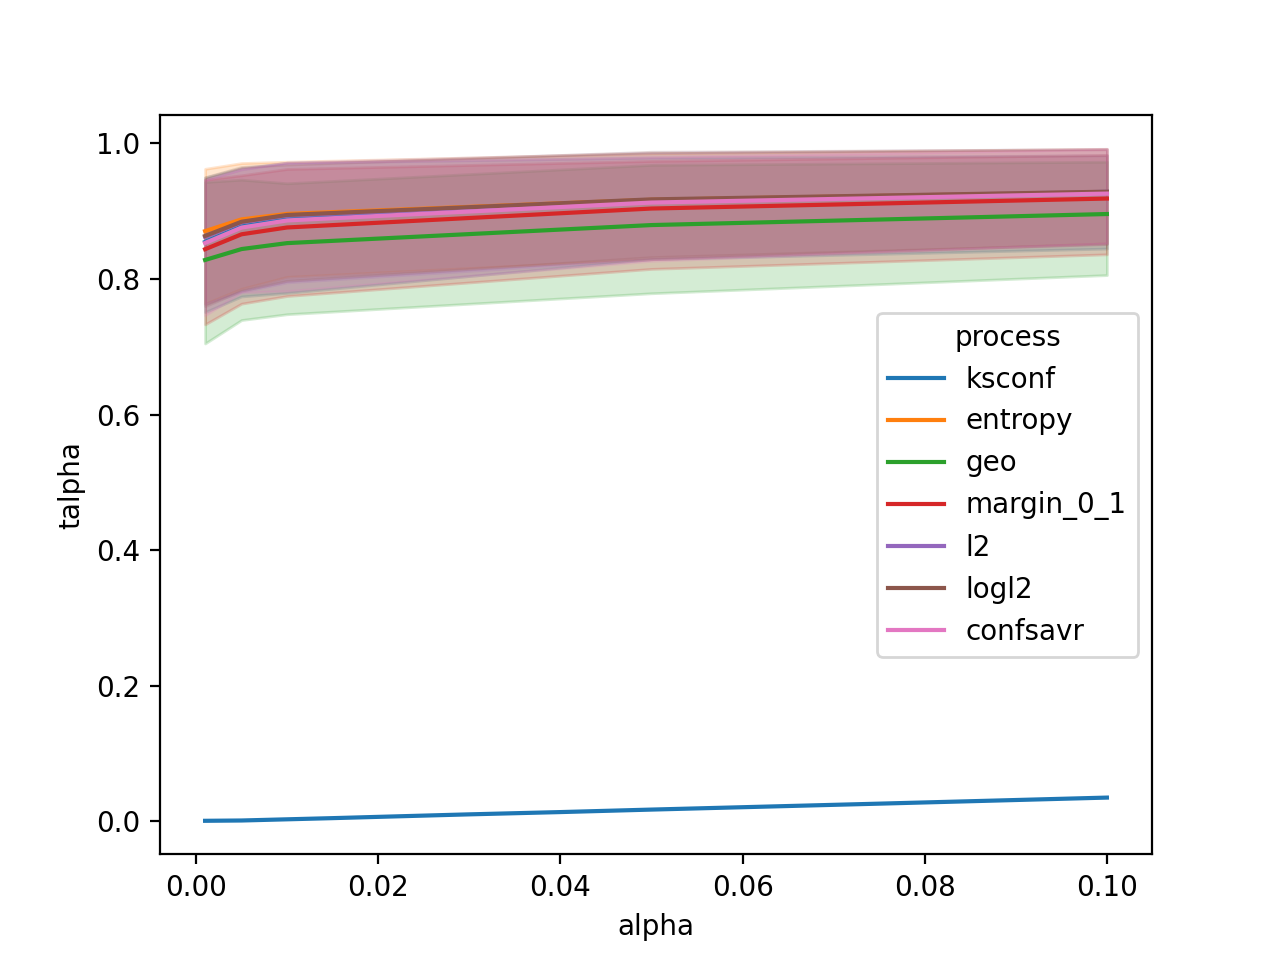

In [252]:
sns.lineplot(data=dfs[-1], x="alpha", y="talpha")

In [275]:
from scipy.stats import ksone
def ks_critical_value(alpha, batch_size):
    return ksone.ppf(1 - alpha / 2, batch_size)

trials = [1, 3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000, 5000, 10000]
alphas = [0.001, 0.005, 0.01, 0.05, 0.1]

# Print table headers
print('{:<6}|{:<6} Level of significance, alpha'.format(' ', ' '))
print('{:<6}|{:>8} {:>8} {:>8} {:>8} {:>8}'.format(*['Trials'] + alphas))
print('-' * 55)
# Print critical values for each n_trials x alpha combination
for t in trials:
    print('{:6d}|{:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f} {:>8.5f} '
          .format(*[t] + [ks_critical_value(a, t) for a in alphas]))
    if t % 10 == 0:
        print()

      |       Level of significance, alpha
Trials|   0.001    0.005     0.01     0.05      0.1
-------------------------------------------------------
     1| 0.99950  0.99750  0.99500  0.97500  0.95000 
     3| 0.92063  0.86428  0.82900  0.70760  0.63604 
     5| 0.78137  0.70543  0.66853  0.56328  0.50945 
    10| 0.58042  0.51872  0.48893  0.40925  0.36866 

    30| 0.34672  0.30818  0.28986  0.24170  0.21756 

    50| 0.27067  0.24039  0.22604  0.18841  0.16959 

   100| 0.19268  0.17104  0.16081  0.13403  0.12067 

   300| 0.11188  0.09930  0.09336  0.07783  0.07009 

   500| 0.08680  0.07704  0.07243  0.06039  0.05439 

  1000| 0.06146  0.05455  0.05129  0.04278  0.03853 

  3000| 0.03553  0.03154  0.02966  0.02474  0.02229 

  5000| 0.02753  0.02444  0.02298  0.01917  0.01727 

 10000| 0.01948  0.01729  0.01626  0.01356  0.01222 



In [579]:
ana = Analysis([Process(SquCal[0], i, j) for i in SquOOS  for j in sing] + [Process(ResCal[0], i, j) for i in ResOOS  for j in sing])

In [580]:
df = ana.compose_report()

In [581]:
df = ana.flatten_results()
df[["process","cdata","tdata"]] = (df["process"].str.split("-", expand=True))[[1,2,3]]
df = df[["cdata", "tdata", "process", "bs", "alpha", "iter", "result"]]
df["tdata"] = [i[3:] for i in df["tdata"]]

In [315]:
ndf = df[df["cdata"]=="SuqCal"].copy()
ndf["resultS"] = ndf["result"]
del ndf["result"]
del ndf["cdata"]
ndf["resultR"] = df[df["cdata"]=="ResCal"]["result"].values
ndf["diff"] = np.abs(ndf["resultS"]-ndf["resultR"])

<IPython.core.display.Javascript object>


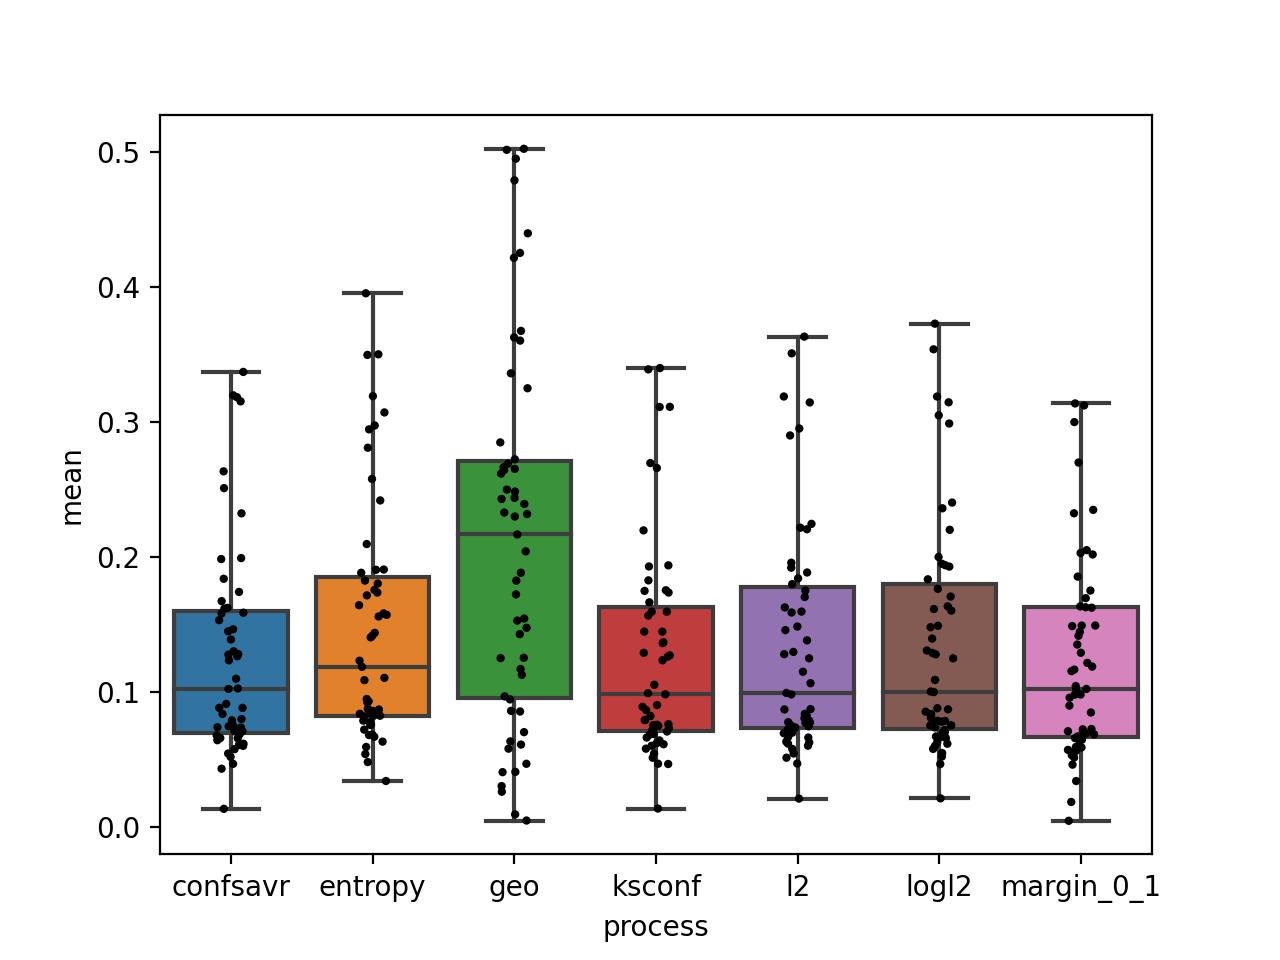

In [339]:
data = []
for i in ndf.groupby(["process", "alpha", "bs"]):
    data.append([j for j in i[0]] + [i[1]["diff"].min(),i[1]["diff"].mean(),i[1]["diff"].max()])
    
rdf = pd.DataFrame(data, columns=["process", "alpha", "bs", "min", "mean", "max"])
ax = sns.boxplot(x="process", y="mean", data=rdf, whis=np.inf)
sns.stripplot(x="process", y="mean", color="black", size=3, data=rdf, ax=ax)


<IPython.core.display.Javascript object>


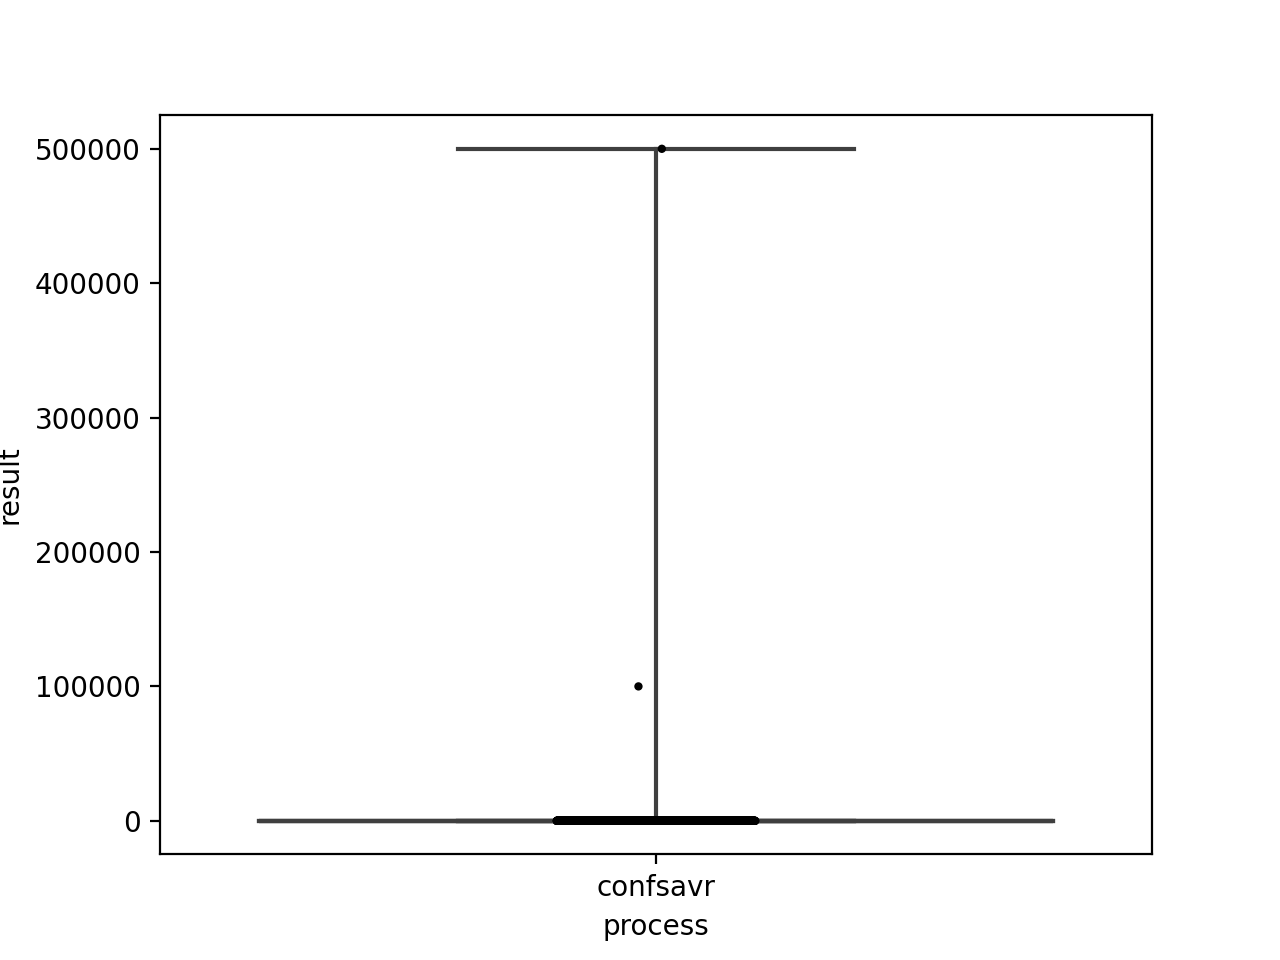

In [342]:
tdf = df[(df["alpha"]==0.01) & (df["bs"]==100) ]
ax = sns.boxplot(x="process", y="result", data=tdf, whis=np.inf)
sns.stripplot(x="process", y="result", color="black", size=3, data=tdf, ax=ax)

In [431]:
dfnz = df.copy()
dfnz["result"]= dfnz["result"]

for i, d in enumerate(dfnz.groupby("process")):
    b = d[1].copy()
    b["result"] = b["result"].values/dfnz[dfnz["process"]=="ksconf"]["result"].values
    #print(b)
    if i == 0:
        new_df = b
    else:
        new_df = pd.concat([new_df, b])
new_df = new_df.replace([np.inf, -np.inf], np.nan)
new_df= new_df.dropna()

<ipython-input-431-7a295096f7ec>:6: RuntimeWarning: divide by zero encountered in true_divide
  b["result"] = b["result"].values/dfnz[dfnz["process"]=="ksconf"]["result"].values
<ipython-input-431-7a295096f7ec>:6: RuntimeWarning: invalid value encountered in true_divide
  b["result"] = b["result"].values/dfnz[dfnz["process"]=="ksconf"]["result"].values


,cdata,tdata,process,bs,alpha,iter,result
330,SuqCal,AwA,confsavr,5.0,0.001,10000.0,1.50000
331,SuqCal,AwA,confsavr,10.0,0.001,10000.0,1.55556
332,SuqCal,AwA,confsavr,30.0,0.001,10000.0,0.93750
333,SuqCal,AwA,confsavr,50.0,0.001,10000.0,0.87671
334,SuqCal,AwA,confsavr,100.0,0.001,10000.0,0.76419
...,...,...,...,...,...,...,...
13690,ResCal,N100,margin_0_1,500.0,0.100,10000.0,1.00000
13691,ResCal,N100,margin_0_1,1000.0,0.100,10000.0,1.00000
13692,ResCal,N100,margin_0_1,3000.0,0.100,10000.0,1.00000
13693,ResCal,N100,margin_0_1,5000.0,0.100,10000.0,1.00000


<IPython.core.display.Javascript object>


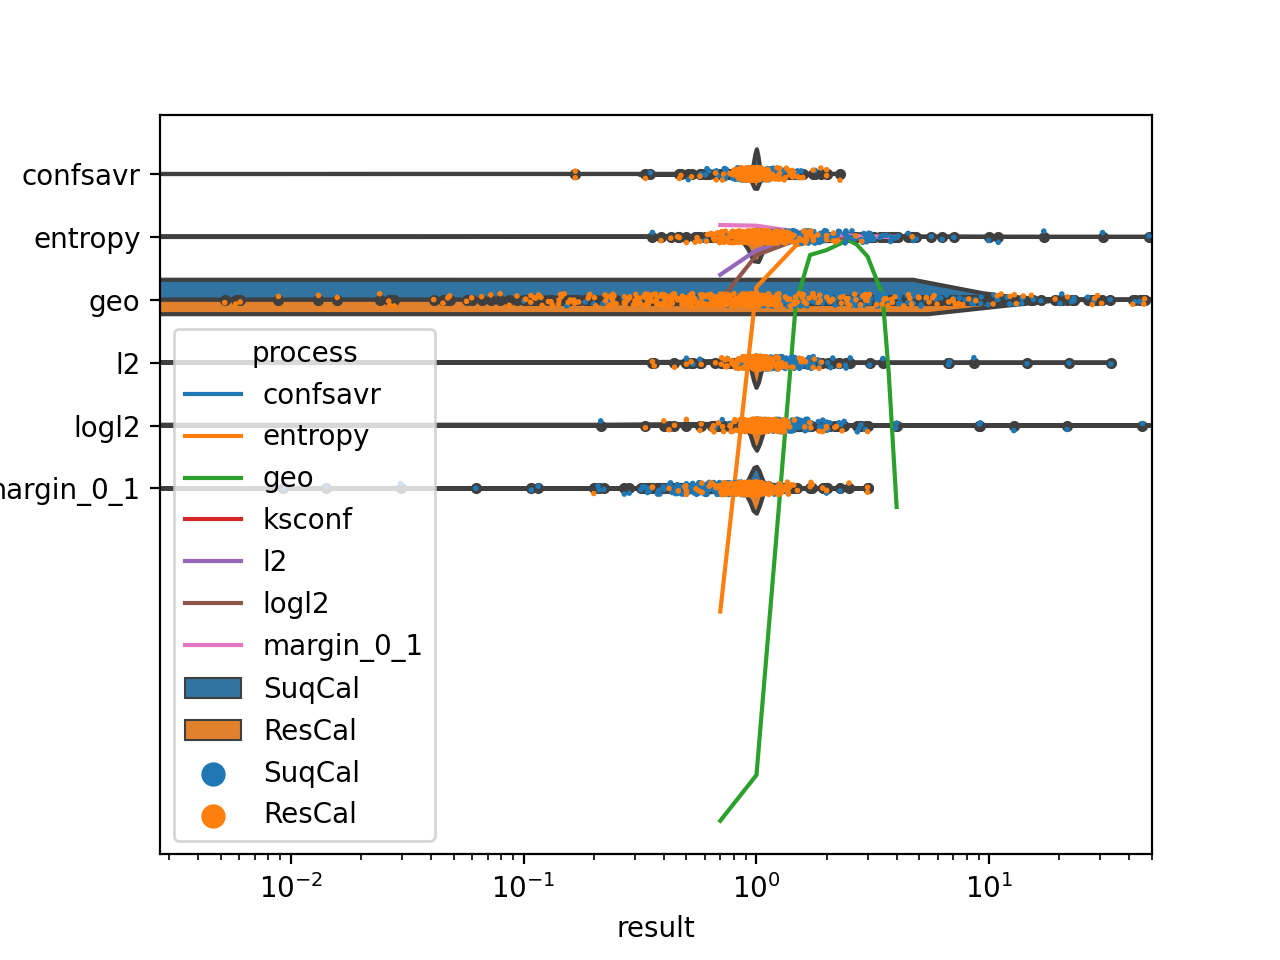

<ipython-input-552-c89544d1447d>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  g.set(xlim=(0,50))


[(0.002740707493537226, 50)]

In [552]:
g = sns.violinplot( inner="point", x="result", y="process", hue="cdata",data=new_df[new_df["process"]!="ksconf"], split=True, scale="area")
g = sns.stripplot(x="result", y="process", hue="cdata",data=new_df[new_df["process"]!="ksconf"], ax=g, size=2, )
g.set(xscale="log")
g.set(xlim=(0,50))
#g = sns.displot( kind="kde", cut=0, x="result", hue="process" , row="cdata",data=new_df)


In [502]:
for i in new_df.groupby("process"):
    print(i[1].max())
    print("-"*100)
    print(i[1].mean())
    print("-"*100)
    print(i[1].min())
    print("#"*100)


cdata        SuqCal
tdata           N50
process    confsavr
bs            10000
alpha           0.1
iter          10000
result       2.2857
dtype: object
----------------------------------------------------------------------------------------------------
bs         1828.77795
alpha         0.03339
iter      10000.00000
result        0.99078
dtype: float64
----------------------------------------------------------------------------------------------------
cdata        ResCal
tdata           AwA
process    confsavr
bs                5
alpha         0.001
iter          10000
result            0
dtype: object
####################################################################################################
cdata       SuqCal
tdata          N50
process    entropy
bs           10000
alpha          0.1
iter         10000
result      532.82
dtype: object
----------------------------------------------------------------------------------------------------
bs         1828.77795
alpha         0.

In [775]:
df2 = df.copy()
df2.loc[(df2["process"]=="ksconf") & (df2["result"]==0), "result"]  = np.nan
new_df = df2.copy()
new_df["rel"] = 0

for i in df["process"].unique():
    new_df.loc[new_df["process"]==i,"rel"] = df2[df2["process"]==i]["result"].values / df2[df2["process"]=="ksconf"]["result"].values
new_df

,cdata,tdata,process,bs,alpha,iter,result,rel
0,SuqCal,AwA,ksconf,5.0,0.001,10000.0,0.0008,1.0
1,SuqCal,AwA,ksconf,10.0,0.001,10000.0,0.0009,1.0
2,SuqCal,AwA,ksconf,30.0,0.001,10000.0,0.0032,1.0
3,SuqCal,AwA,ksconf,50.0,0.001,10000.0,0.0073,1.0
4,SuqCal,AwA,ksconf,100.0,0.001,10000.0,0.0229,1.0
...,...,...,...,...,...,...,...,...
13855,ResCal,N100,confsavr,500.0,0.100,10000.0,1.0000,1.0
13856,ResCal,N100,confsavr,1000.0,0.100,10000.0,1.0000,1.0
13857,ResCal,N100,confsavr,3000.0,0.100,10000.0,1.0000,1.0
13858,ResCal,N100,confsavr,5000.0,0.100,10000.0,1.0000,1.0


In [776]:
# new_df2 = df.copy()
#new_df2["rel"] = 0
#ke = ["cdata", "tdata", "process", "bs", "alpha"]
#for i in df.groupby(["cdata", "tdata", "process", "bs", "alpha"]):
#    k = (new_df2["cdata"]==i[0][0]) & (new_df2["tdata"]==i[0][1]) & (new_df2["process"]==i[0][2]) & (new_df2["bs"]==i[0][3]) & (new_df2["alpha"]==i[0][4])
#    k2 = (new_df2["cdata"]==i[0][0]) & (new_df2["tdata"]==i[0][1]) & (new_df2["process"]=="ksconf") & (new_df2["bs"]==i[0][3]) & (new_df2["alpha"]==i[0][4])
#    new_df2.loc[k, "rel"] = df[k]["result"].values /  df[k2]["result"].values
#new_df2

<IPython.core.display.Javascript object>


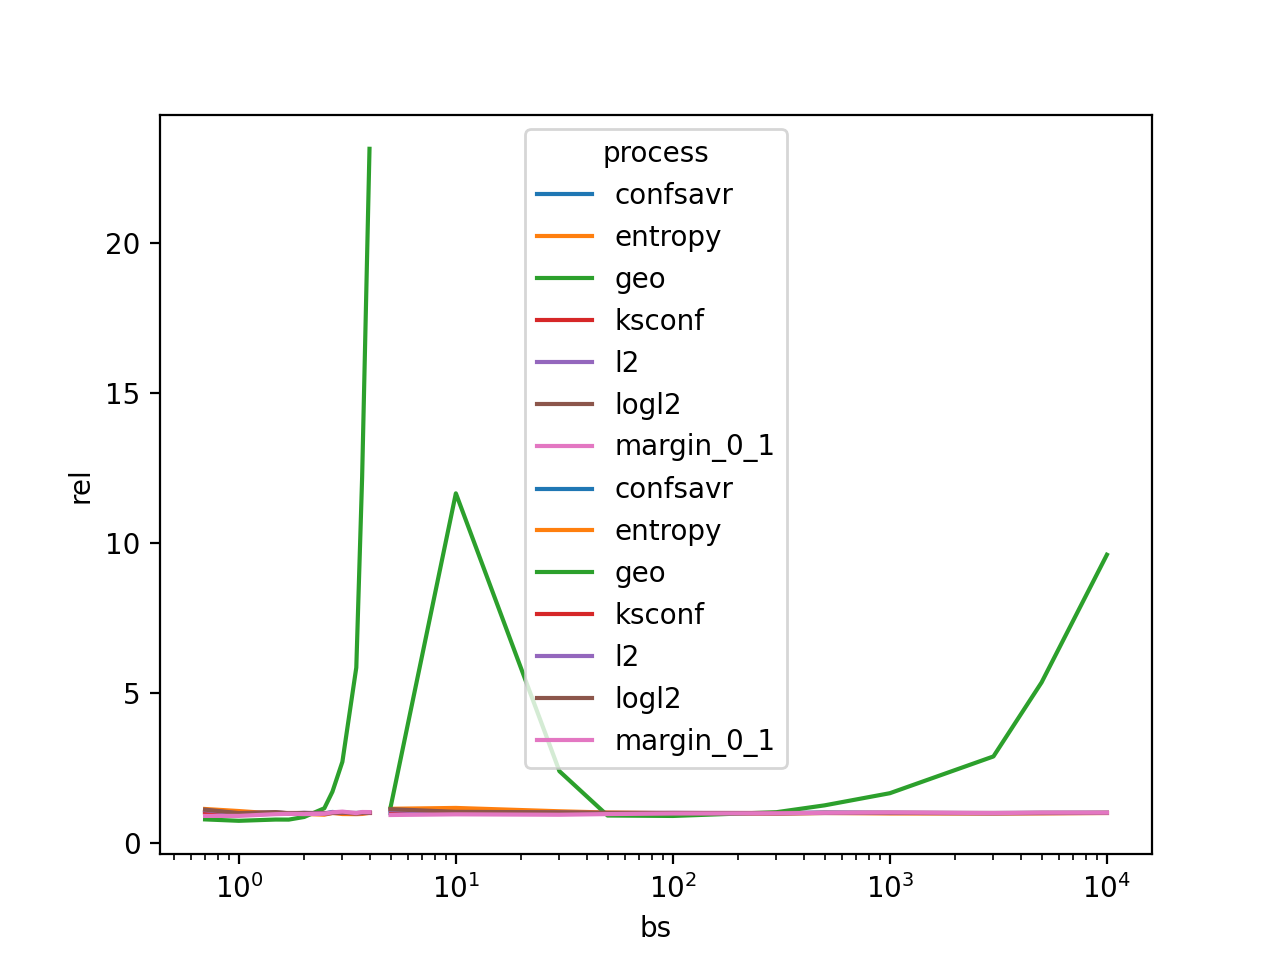

[None]

In [777]:
para = "bs"
rel_df = (new_df[(new_df["cdata"]=="ResCal") ].groupby(["process",para])).mean()
g = sns.lineplot(data=rel_df, x=para, y="rel", hue="process")
g.set(xscale="log")
#& (new_df["process"]!="geo")

In [773]:
new_df[(new_df["process"]=="logl2") & (new_df["bs"]==5) & (new_df["cdata"]=="ResCal") ]

,cdata,tdata,process,bs,alpha,iter,result,rel
7205,ResCal,AwA,logl2,5.0,0.001,10000.0,0.0016,1.45455
7216,ResCal,AwA,logl2,5.0,0.005,10000.0,0.0035,0.68627
7227,ResCal,AwA,logl2,5.0,0.010,10000.0,0.0073,0.98649
7238,ResCal,AwA,logl2,5.0,0.050,10000.0,0.0437,0.91423
7249,ResCal,AwA,logl2,5.0,0.100,10000.0,0.0960,0.92664
7590,ResCal,D1,logl2,5.0,0.001,10000.0,0.0027,1.92857
7601,ResCal,D1,logl2,5.0,0.005,10000.0,0.0094,1.02174
7612,ResCal,D1,logl2,5.0,0.010,10000.0,0.0174,1.09434
7623,ResCal,D1,logl2,5.0,0.050,10000.0,0.0806,1.11789
7634,ResCal,D1,logl2,5.0,0.100,10000.0,0.1353,1.06284


In [770]:
new_df[(new_df["process"]=="ksconf") & (new_df["bs"]==10) & (new_df["cdata"]=="ResCal") ]

,cdata,tdata,process,bs,alpha,iter,result,rel
6931,ResCal,AwA,ksconf,10.0,0.001,10000.0,1.40000e-03,1.0
6942,ResCal,AwA,ksconf,10.0,0.005,10000.0,5.50000e-03,1.0
6953,ResCal,AwA,ksconf,10.0,0.010,10000.0,1.10000e-02,1.0
6964,ResCal,AwA,ksconf,10.0,0.050,10000.0,5.96000e-02,1.0
6975,ResCal,AwA,ksconf,10.0,0.100,10000.0,1.13700e-01,1.0
7316,ResCal,D1,ksconf,10.0,0.001,10000.0,3.50000e-03,1.0
7327,ResCal,D1,ksconf,10.0,0.005,10000.0,1.45000e-02,1.0
7338,ResCal,D1,ksconf,10.0,0.010,10000.0,2.58000e-02,1.0
7349,ResCal,D1,ksconf,10.0,0.050,10000.0,9.04000e-02,1.0
7360,ResCal,D1,ksconf,10.0,0.100,10000.0,1.70000e-01,1.0


In [771]:
new_df[(new_df["process"]=="entropy") & (new_df["bs"]==10) & (new_df["cdata"]=="ResCal") ]

,cdata,tdata,process,bs,alpha,iter,result,rel
6986,ResCal,AwA,entropy,10.0,0.001,10000.0,0.0008,0.57143
6997,ResCal,AwA,entropy,10.0,0.005,10000.0,0.0035,0.63636
7008,ResCal,AwA,entropy,10.0,0.010,10000.0,0.0095,0.86364
7019,ResCal,AwA,entropy,10.0,0.050,10000.0,0.0555,0.93121
7030,ResCal,AwA,entropy,10.0,0.100,10000.0,0.1087,0.95602
7371,ResCal,D1,entropy,10.0,0.001,10000.0,0.0040,1.14286
7382,ResCal,D1,entropy,10.0,0.005,10000.0,0.0141,0.97241
7393,ResCal,D1,entropy,10.0,0.010,10000.0,0.0292,1.13178
7404,ResCal,D1,entropy,10.0,0.050,10000.0,0.1024,1.13274
7415,ResCal,D1,entropy,10.0,0.100,10000.0,0.1760,1.03529


In [729]:
#new_df = df.copy()
#new_df["rel"] = 0
#for i in df["process"].unique():
#    new_df.loc[new_df["process"]==i,"rel"] = df[df["process"]==i]["result"].values / df[df["process"]=="ksconf"]["result"].values
#new_df

<ipython-input-729-d75066967895>:4: RuntimeWarning: invalid value encountered in true_divide
  new_df.loc[new_df["process"]==i,"rel"] = df[df["process"]==i]["result"].values / df[df["process"]=="ksconf"]["result"].values
<ipython-input-729-d75066967895>:4: RuntimeWarning: divide by zero encountered in true_divide
  new_df.loc[new_df["process"]==i,"rel"] = df[df["process"]==i]["result"].values / df[df["process"]=="ksconf"]["result"].values


,cdata,tdata,process,bs,alpha,iter,result,rel
0,SuqCal,AwA,ksconf,5.0,0.001,10000.0,0.0008,1.0
1,SuqCal,AwA,ksconf,10.0,0.001,10000.0,0.0009,1.0
2,SuqCal,AwA,ksconf,30.0,0.001,10000.0,0.0032,1.0
3,SuqCal,AwA,ksconf,50.0,0.001,10000.0,0.0073,1.0
4,SuqCal,AwA,ksconf,100.0,0.001,10000.0,0.0229,1.0
...,...,...,...,...,...,...,...,...
13855,ResCal,N100,confsavr,500.0,0.100,10000.0,1.0000,1.0
13856,ResCal,N100,confsavr,1000.0,0.100,10000.0,1.0000,1.0
13857,ResCal,N100,confsavr,3000.0,0.100,10000.0,1.0000,1.0
13858,ResCal,N100,confsavr,5000.0,0.100,10000.0,1.0000,1.0


In [778]:
data_df = new_df[new_df["tdata"]!="AwA"].copy()
data_df["range"] = [i[1:] for i in data_df["tdata"]]
data_df["tdata"] = [i[0] for i in data_df["tdata"]]
data_df

,cdata,tdata,process,bs,alpha,iter,result,rel,range
385,SuqCal,D,ksconf,5.0,0.001,10000.0,0.0055,1.0,1
386,SuqCal,D,ksconf,10.0,0.001,10000.0,0.0223,1.0,1
387,SuqCal,D,ksconf,30.0,0.001,10000.0,0.2127,1.0,1
388,SuqCal,D,ksconf,50.0,0.001,10000.0,0.5382,1.0,1
389,SuqCal,D,ksconf,100.0,0.001,10000.0,0.9580,1.0,1
...,...,...,...,...,...,...,...,...,...
13855,ResCal,N,confsavr,500.0,0.100,10000.0,1.0000,1.0,100
13856,ResCal,N,confsavr,1000.0,0.100,10000.0,1.0000,1.0,100
13857,ResCal,N,confsavr,3000.0,0.100,10000.0,1.0000,1.0,100
13858,ResCal,N,confsavr,5000.0,0.100,10000.0,1.0000,1.0,100


<IPython.core.display.Javascript object>


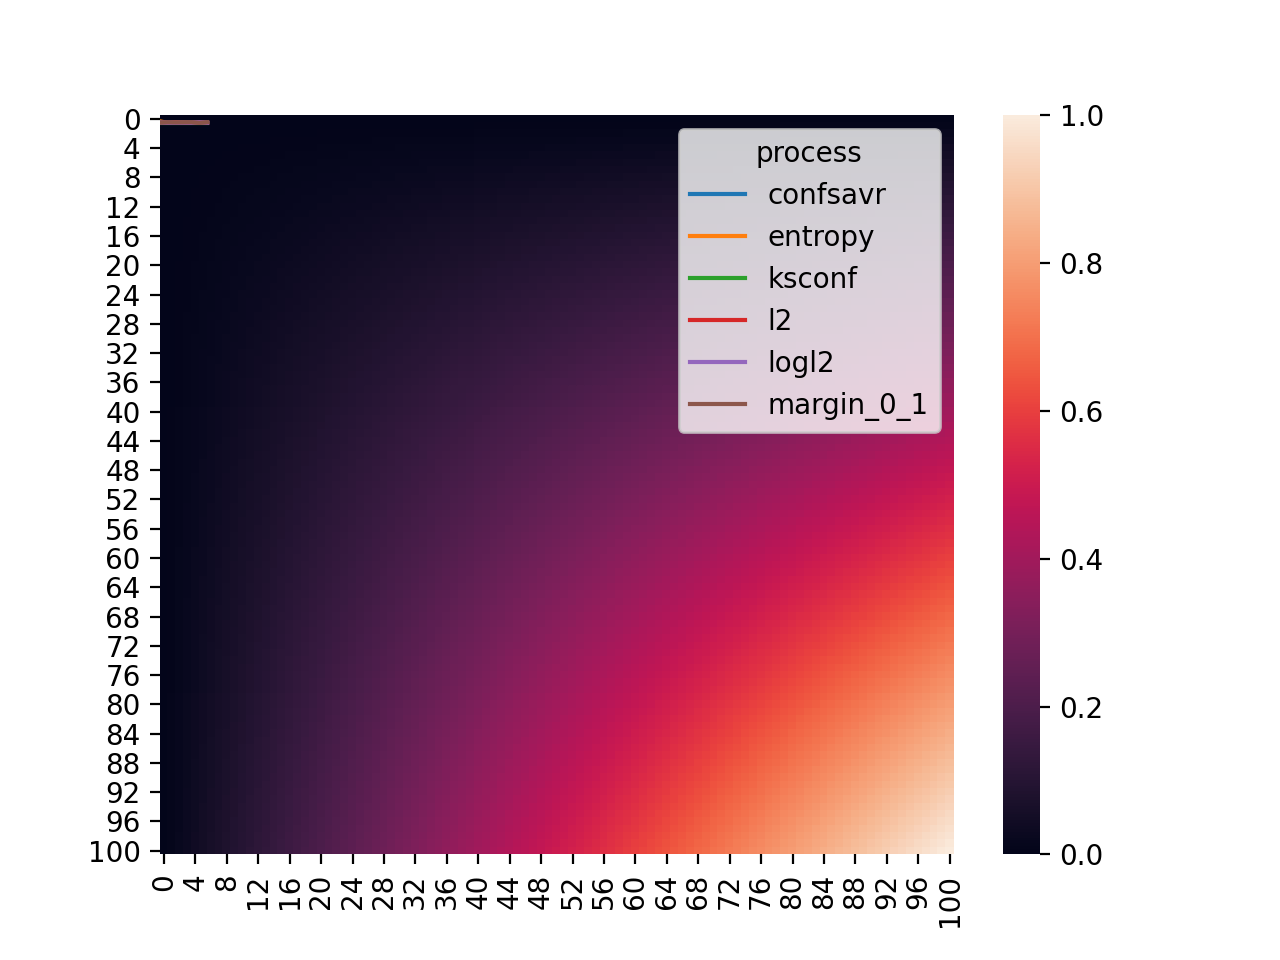

In [820]:
para = "range"
rel_df = (data_df[(data_df["cdata"]=="ResCal") & (data_df["tdata"]=="N") & (data_df["process"]!="geo") ].groupby(["process",para])).mean()
g = sns.lineplot(data=rel_df, x=para, y="rel", hue="process")
#g.set(xscale="log")

In [801]:
rel_df

alpha     iter   result       rel
process    bs                                         
confsavr   5.0      0.0332  10000.0  0.10448   1.04421
           10.0     0.0332  10000.0  0.18630   0.93859
           30.0     0.0332  10000.0  0.35913   0.97616
           50.0     0.0332  10000.0  0.41226   0.98584
           100.0    0.0332  10000.0  0.48365   1.00122
           300.0    0.0332  10000.0  0.59201   0.98261
           500.0    0.0332  10000.0  0.64531   1.03559
           1000.0   0.0332  10000.0  0.70883   1.00522
           3000.0   0.0332  10000.0  0.78046   1.00062
           5000.0   0.0332  10000.0  0.81331   1.01197
           10000.0  0.0332  10000.0  0.85496   1.00936
entropy    5.0      0.0332  10000.0  0.12157   1.13421
           10.0     0.0332  10000.0  0.21594   1.06570
           30.0     0.0332  10000.0  0.37265   0.98098
           50.0     0.0332  10000.0  0.42064   0.98068
           100.0    0.0332  10000.0  0.48768   0.96998
           300.0    0.0332  10000.0  0.58937   0.94439
           500.0    0.0332  10000.0  0.64136   1.00479
           1000.0   0.0332  10000.0  0.70031   0.96642
           3000.0   0.0332  10000.0  0.76705   0.96212
           5000.0   0.0332  10000.0  0.79476   0.96927
           10000.0  0.0332  10000.0  0.84185   1.00642
geo        5.0      0.0332  10000.0  0.07721   0.78748
           10.0     0.0332  10000.0  0.14216   0.74081
           30.0     0.0332  10000.0  0.30061   0.78238
           50.0     0.0332  10000.0  0.33957   0.78083
           100.0    0.0332  10000.0  0.37822   0.86824
           300.0    0.0332  10000.0  0.46413   1.15915
           500.0    0.0332  10000.0  0.49812   1.71008
           1000.0   0.0332  10000.0  0.55542   2.70727
           3000.0   0.0332  10000.0  0.74225   5.84733
           5000.0   0.0332  10000.0  0.84862  12.18983
           10000.0  0.0332  10000.0  0.95431  23.13070
ksconf     5.0      0.0332  10000.0  0.10655   1.00000
           10.0     0.0332  10000.0  0.19117   1.00000
           30.0     0.0332  10000.0  0.36124   1.00000
           50.0     0.0332  10000.0  0.41459   1.00000
           100.0    0.0332  10000.0  0.48390   1.00000
           300.0    0.0332  10000.0  0.59270   1.00000
           500.0    0.0332  10000.0  0.64637   1.00000
           1000.0   0.0332  10000.0  0.70827   1.00000
           3000.0   0.0332  10000.0  0.77913   1.00000
           5000.0   0.0332  10000.0  0.81194   1.00000
           10000.0  0.0332  10000.0  0.85491   1.00000
l2         5.0      0.0332  10000.0  0.11229   1.09274
           10.0     0.0332  10000.0  0.19814   0.98565
           30.0     0.0332  10000.0  0.36589   1.02538
           50.0     0.0332  10000.0  0.41733   0.98836
           100.0    0.0332  10000.0  0.48672   1.00596
           300.0    0.0332  10000.0  0.59457   0.98869
           500.0    0.0332  10000.0  0.64792   1.01081
           1000.0   0.0332  10000.0  0.70960   1.01589
           3000.0   0.0332  10000.0  0.77969   0.98954
           5000.0   0.0332  10000.0  0.81168   0.99743
           10000.0  0.0332  10000.0  0.85487   1.01087
logl2      5.0      0.0332  10000.0  0.11360   1.11272
           10.0     0.0332  10000.0  0.19969   0.99592
           30.0     0.0332  10000.0  0.36757   1.02972
           50.0     0.0332  10000.0  0.41846   0.99221
           100.0    0.0332  10000.0  0.48843   0.99241
           300.0    0.0332  10000.0  0.59585   0.97271
           500.0    0.0332  10000.0  0.64875   1.00164
           1000.0   0.0332  10000.0  0.71038   1.01377
           3000.0   0.0332  10000.0  0.77922   0.98405
           5000.0   0.0332  10000.0  0.81150   1.00674
           10000.0  0.0332  10000.0  0.85442   1.01203
margin_0_1 5.0      0.0332  10000.0  0.09464   0.90347
           10.0     0.0332  10000.0  0.17372   0.90432
           30.0     0.0332  10000.0  0.35047   0.96198
           50.0     0.0332  10000.0  0.40637   0.97329
           100.0    0.0332  10000.0  0.47816   0.96293
      

In [808]:
check_df = df[df["tdata"]!="AwA"].copy()
check_df["range"] = [i[1:] for i in check_df["tdata"]]
check_df["tdata"] = [i[0] for i in check_df["tdata"]]


In [810]:
check_df[(check_df["tdata"]=="N") & (check_df["cdata"]=="ResCal") & (check_df["tdata"]=="N") & (check_df["bs"]==10000) & (check_df["alpha"]==0.001)]





,cdata,tdata,process,bs,alpha,iter,result,range
11175,ResCal,N,ksconf,10000.0,0.001,10000.0,0.0013,5
11230,ResCal,N,entropy,10000.0,0.001,10000.0,0.0029,5
11285,ResCal,N,geo,10000.0,0.001,10000.0,0.8237,5
11340,ResCal,N,margin_0_1,10000.0,0.001,10000.0,0.0025,5
11395,ResCal,N,l2,10000.0,0.001,10000.0,0.0023,5
11450,ResCal,N,logl2,10000.0,0.001,10000.0,0.0022,5
11505,ResCal,N,confsavr,10000.0,0.001,10000.0,0.0020,5
11560,ResCal,N,ksconf,10000.0,0.001,10000.0,0.8048,10
11615,ResCal,N,entropy,10000.0,0.001,10000.0,0.6322,10
11670,ResCal,N,geo,10000.0,0.001,10000.0,1.0000,10


In [802]:
check_df = check_df[(check_df["cdata"]>"ResCal") & (check_df["bs"]==10000) & (check_df["tdata"]=="N")]
b = check_df[check_df["process"]=="ksconf"].copy()

In [803]:
b["geo"] =  check_df[check_df["process"]=="geo"]["result"].values
b["rel"] =  b["geo"]/b["result"]

In [804]:
b

,cdata,tdata,process,bs,alpha,iter,result,rel,range,geo
4245,SuqCal,N,ksconf,10000.0,0.001,10000.0,0.9960,0.39980,5,0.3982
4256,SuqCal,N,ksconf,10000.0,0.005,10000.0,0.9993,0.58081,5,0.5804
4267,SuqCal,N,ksconf,10000.0,0.010,10000.0,1.0000,0.67670,5,0.6767
4278,SuqCal,N,ksconf,10000.0,0.050,10000.0,1.0000,0.86070,5,0.8607
4289,SuqCal,N,ksconf,10000.0,0.100,10000.0,1.0000,0.91930,5,0.9193
4630,SuqCal,N,ksconf,10000.0,0.001,10000.0,1.0000,1.00000,10,1.0000
4641,SuqCal,N,ksconf,10000.0,0.005,10000.0,1.0000,1.00000,10,1.0000
4652,SuqCal,N,ksconf,10000.0,0.010,10000.0,1.0000,1.00000,10,1.0000
4663,SuqCal,N,ksconf,10000.0,0.050,10000.0,1.0000,1.00000,10,1.0000
4674,SuqCal,N,ksconf,10000.0,0.100,10000.0,1.0000,1.00000,10,1.0000


In [805]:
check_df = data_df[(data_df["cdata"]>"ResCal") & (data_df["bs"]==10000) & (data_df["tdata"]=="N")]
b2 = check_df[check_df["process"]=="ksconf"].copy()

In [806]:
b2["geo"] =  check_df[check_df["process"]=="geo"]["result"].values
b2["rel"] =  b2["geo"]/b2["result"]
b2

,cdata,tdata,process,bs,alpha,iter,result,rel,range,geo
4245,SuqCal,N,ksconf,10000.0,0.001,10000.0,0.9960,0.39980,5,0.3982
4256,SuqCal,N,ksconf,10000.0,0.005,10000.0,0.9993,0.58081,5,0.5804
4267,SuqCal,N,ksconf,10000.0,0.010,10000.0,1.0000,0.67670,5,0.6767
4278,SuqCal,N,ksconf,10000.0,0.050,10000.0,1.0000,0.86070,5,0.8607
4289,SuqCal,N,ksconf,10000.0,0.100,10000.0,1.0000,0.91930,5,0.9193
4630,SuqCal,N,ksconf,10000.0,0.001,10000.0,1.0000,1.00000,10,1.0000
4641,SuqCal,N,ksconf,10000.0,0.005,10000.0,1.0000,1.00000,10,1.0000
4652,SuqCal,N,ksconf,10000.0,0.010,10000.0,1.0000,1.00000,10,1.0000
4663,SuqCal,N,ksconf,10000.0,0.050,10000.0,1.0000,1.00000,10,1.0000
4674,SuqCal,N,ksconf,10000.0,0.100,10000.0,1.0000,1.00000,10,1.0000


In [799]:
b["rel"]-b2["rel"]

4243    0.0
4244    0.0
4245    0.0
4254    0.0
4255    0.0
4256    0.0
4265    0.0
4266    0.0
4267    0.0
4276    0.0
4277    0.0
4278    0.0
4287    0.0
4288    0.0
4289    0.0
4628    0.0
4629    0.0
4630    0.0
4639    0.0
4640    0.0
4641    0.0
4650    0.0
4651    0.0
4652    0.0
4661    0.0
4662    0.0
4663    0.0
4672    0.0
4673    0.0
4674    0.0
5013    0.0
5014    0.0
5015    0.0
5024    0.0
5025    0.0
5026    0.0
5035    0.0
5036    0.0
5037    0.0
5046    0.0
5047    0.0
5048    0.0
5057    0.0
5058    0.0
5059    0.0
5398    0.0
5399    0.0
5400    0.0
5409    0.0
5410    0.0
5411    0.0
5420    0.0
5421    0.0
5422    0.0
5431    0.0
5432    0.0
5433    0.0
5442    0.0
5443    0.0
5444    0.0
5783    0.0
5784    0.0
5785    0.0
5794    0.0
5795    0.0
5796    0.0
5805    0.0
5806    0.0
5807    0.0
5816    0.0
5817    0.0
5818    0.0
5827    0.0
5828    0.0
5829    0.0
6168    0.0
6169    0.0
6170    0.0
6179    0.0
6180    0.0
6181    0.0
6190    0.0
6191    0.0
6192

In [826]:
x =[1,3,5,6,10,18,80]
y = [i/(len(x)+1) for i in range(1, len(x)+1)]
np.interp(1, x, y)

0.125

In [835]:
n = 1000
x = [0.5, 0.5]
np.linalg.norm(x)

0.7071067811865476

In [836]:
np.sqrt(1)

1.0

In [856]:
1/3*1/3*1/3

0.037037037037037035

<IPython.core.display.Javascript object>


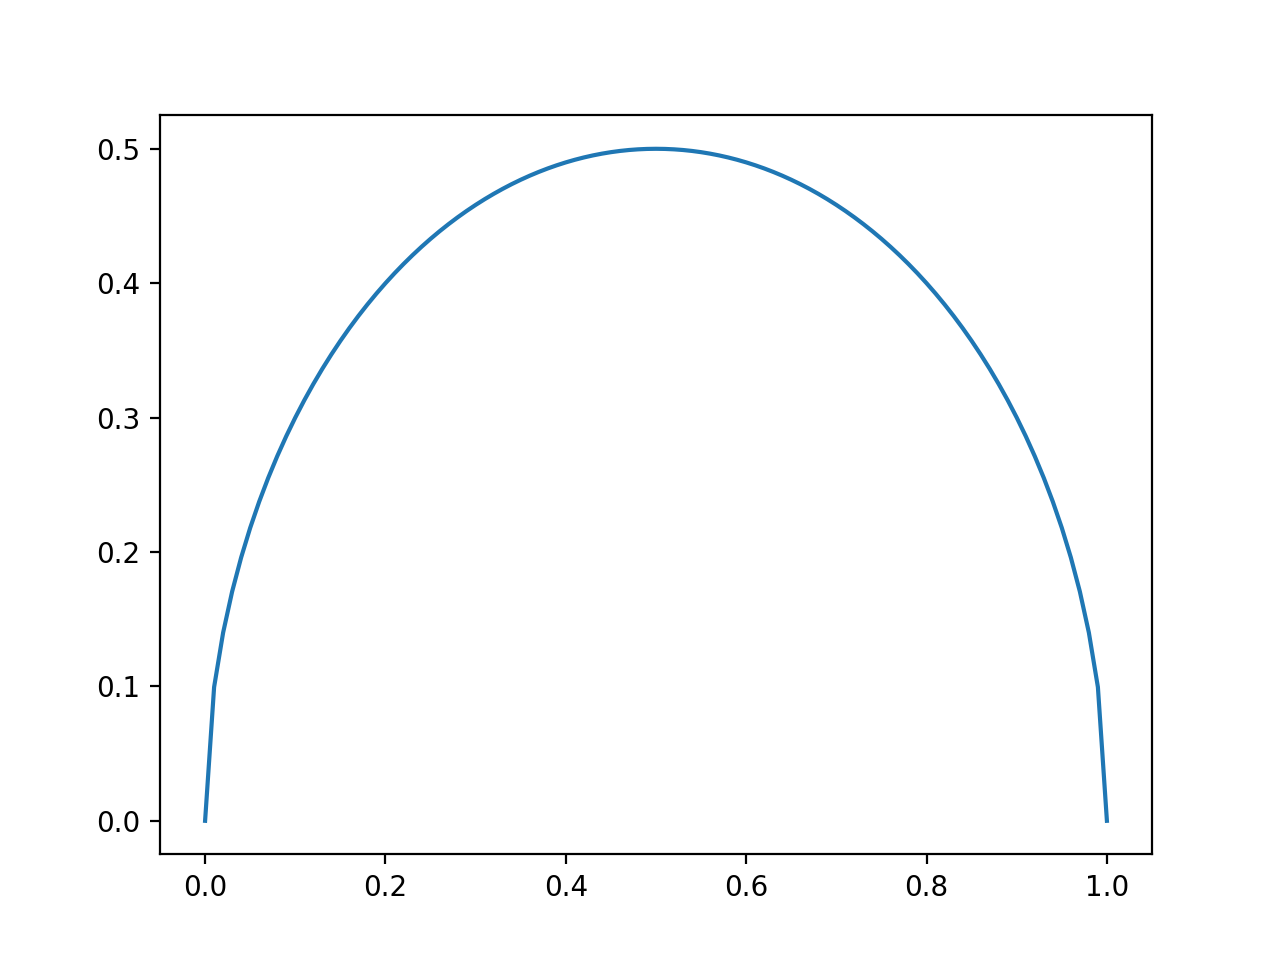

In [849]:
x=[i/100 for i in range(100+1)]
y  = [1-i for i in x]
sns.lineplot(x=x, y= np.sqrt(np.multiply(x,y)))


In [890]:
pd.read_csv("clf/entropy-ResNet50_AwA_data.csv", names=["res"]).max()

res    0.79253
dtype: float64

In [886]:
pd.read_csv("geo-SqueezeNet_ILSVRC_cal_data.csv", names=["res"]).max()

res    0.0002
dtype: float64

In [875]:
n=4

x = [0.85, 0.05,0.05, 0.05]
stats.entropy(x) / stats.entropy([1/n for i in range(n)])

0.4237923399122869

In [1]:
ma = sorted(["ksconf", "margin_0_1", "geo", "l2", "entropy"])
na = {"ksconf":"max", "margin_0_1":"margin", "geo":"geo", "l2":"l2", "entropy":"entropy"}
mb = sorted(["ResNet50", "SqueezeNet", "MobileNet25"])
nb = {"ResNet50":"Res", "SqueezeNet":"Squ", "MobileNet25":"Mob"}
dfs = [pd.concat([pd.read_csv("clf/{0}-{1}_ILSVRC_cal_data.csv".format(i,j), names=[na[i]]) for i in ma], axis=1).unstack().reset_index().rename(columns={"level_0":"tau", 0:nb[j]}).drop(columns=["level_1"]).reset_index().set_index(["index","tau"])  for j in mb]

df = dfs[0].join(dfs[1]).join(dfs[2]).melt(ignore_index=False)
df

NameError: name 'pd' is not defined